In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../utils')
from dataPiping import *

import numpy as np
import pandas as pd
import math
import datetime
from sklearn.ensemble import RandomForestRegressor

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import exp, fabs, sqrt, log, pi
import random

In [16]:
rnd=57
random.seed(rnd)

In [17]:
X, y = getAggrSet()
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)
y_train = y_train.values
y_test = y_test.values

In [6]:
def pltBars(values, labels):
    fig = plt.figure(figsize=(20,5))
    plt.bar(range(len(values)), values)
    plt.xticks(range(len(values)), labels)

## Random Forest Regression

In [12]:
model = RandomForestRegressor()

In [33]:
param_grid = {
    'max_features': range(1, len(X.columns)+1),
    'n_estimators': [100],
    'max_depth': range(1,25),
    'min_samples_leaf': range(1,20)
}

In [34]:
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, verbose=2, n_jobs=4)

In [35]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=10, n_estimators=100, max_features=11, min_samples_leaf=17 
[CV] max_depth=10, n_estimators=100, max_features=11, min_samples_leaf=17 
[CV] max_depth=10, n_estimators=100, max_features=11, min_samples_leaf=17 
[CV] max_depth=18, n_estimators=100, max_features=4, min_samples_leaf=11 
[CV]  max_depth=18, n_estimators=100, max_features=4, min_samples_leaf=11, total=   6.1s
[CV] max_depth=18, n_estimators=100, max_features=4, min_samples_leaf=11 
[CV]  max_depth=10, n_estimators=100, max_features=11, min_samples_leaf=17, total=   8.0s
[CV] max_depth=18, n_estimators=100, max_features=4, min_samples_leaf=11 
[CV]  max_depth=10, n_estimators=100, max_features=11, min_samples_leaf=17, total=   8.4s
[CV] max_depth=1, n_estimators=100, max_features=9, min_samples_leaf=2 
[CV]  max_depth=1, n_estimators=100, max_features=9, min_samples_leaf=2, total=   0.9s
[CV] max_depth=1, n_estimators=100, max_features=9, min_sample

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   39.1s


[CV]  max_depth=1, n_estimators=100, max_features=3, min_samples_leaf=2, total=   0.4s
[CV] max_depth=1, n_estimators=100, max_features=3, min_samples_leaf=2 
[CV]  max_depth=1, n_estimators=100, max_features=3, min_samples_leaf=2, total=   0.4s
[CV] max_depth=1, n_estimators=100, max_features=3, min_samples_leaf=2 
[CV]  max_depth=1, n_estimators=100, max_features=3, min_samples_leaf=2, total=   0.4s
[CV] max_depth=12, n_estimators=100, max_features=2, min_samples_leaf=8 
[CV]  max_depth=12, n_estimators=100, max_features=2, min_samples_leaf=8, total=   2.1s
[CV] max_depth=12, n_estimators=100, max_features=2, min_samples_leaf=8 
[CV]  max_depth=12, n_estimators=100, max_features=2, min_samples_leaf=8, total=   2.1s
[CV] max_depth=12, n_estimators=100, max_features=2, min_samples_leaf=8 
[CV]  max_depth=12, n_estimators=100, max_features=2, min_samples_leaf=8, total=   2.1s
[CV] max_depth=22, n_estimators=100, max_features=2, min_samples_leaf=7 
[CV]  max_depth=21, n_estimators=100, m

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.7min


[CV]  max_depth=22, n_estimators=100, max_features=3, min_samples_leaf=15, total=   3.3s
[CV] max_depth=17, n_estimators=100, max_features=3, min_samples_leaf=10 
[CV]  max_depth=14, n_estimators=100, max_features=10, min_samples_leaf=3, total=  10.1s
[CV] max_depth=11, n_estimators=100, max_features=13, min_samples_leaf=10 
[CV]  max_depth=17, n_estimators=100, max_features=3, min_samples_leaf=10, total=   3.6s
[CV] max_depth=11, n_estimators=100, max_features=13, min_samples_leaf=10 
[CV]  max_depth=17, n_estimators=100, max_features=3, min_samples_leaf=10, total=   3.4s
[CV] max_depth=11, n_estimators=100, max_features=13, min_samples_leaf=10 
[CV]  max_depth=17, n_estimators=100, max_features=3, min_samples_leaf=10, total=   3.4s
[CV] max_depth=14, n_estimators=100, max_features=12, min_samples_leaf=19 
[CV]  max_depth=11, n_estimators=100, max_features=13, min_samples_leaf=10, total=  10.5s
[CV] max_depth=14, n_estimators=100, max_features=12, min_samples_leaf=19 
[CV]  max_depth=

[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  7.5min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=4,
          param_distributions={'max_depth': range(1, 25), 'n_estimators': [100], 'max_features': range(1, 14), 'min_samples_leaf': range(1, 20)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [36]:
grid.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 11,
 'n_estimators': 100}

In [7]:
# rf = RandomForestRegressor(**grid.best_params_)
rf = RandomForestRegressor(max_depth=8,max_features=8,min_samples_leaf=11,n_estimators=100)

In [8]:
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=11, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

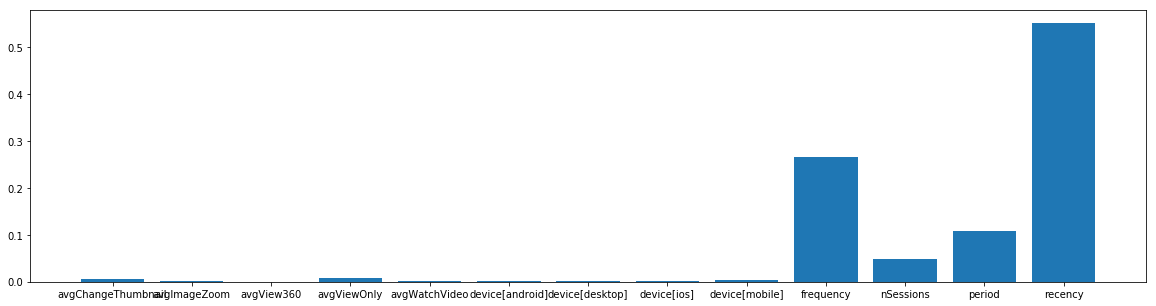

In [9]:
pltBars(rf.feature_importances_, X.columns)

In [10]:
rmse = sqrt(mean_squared_error(y_test, rf.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'71 days, 7:29:21.742627'

In [13]:
rmse_train = sqrt(mean_squared_error(y_train, rf.predict(X_train)))
str(datetime.timedelta(seconds=rmse_train))

'70 days, 1:09:10.312174'